In [1]:
import os 
from scipy import ndimage
from subprocess import check_output

import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

(<matplotlib.axes._subplots.AxesSubplot at 0x7f6a2e98d080>,
 <matplotlib.image.AxesImage at 0x7f69f4d4f048>)

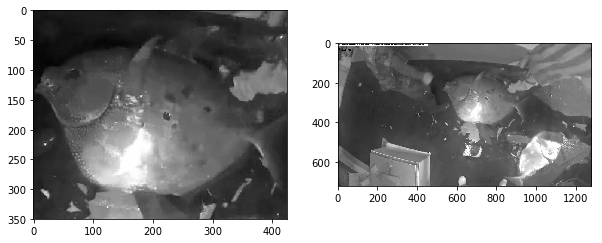

In [2]:
img_rows, img_cols= 350, 425
im_array = cv2.imread('../input/train/LAG/img_00091.jpg',0)
template = np.zeros([ img_rows, img_cols], dtype='uint8') # initialisation of the template
template[:, :] = im_array[100:450,525:950] # I try multiple times to find the correct rectangle. 
#template /= 255.
plt.subplots(figsize=(10, 7))
plt.subplot(121),plt.imshow(template, cmap='gray') 
plt.subplot(122), plt.imshow(im_array, cmap='gray')

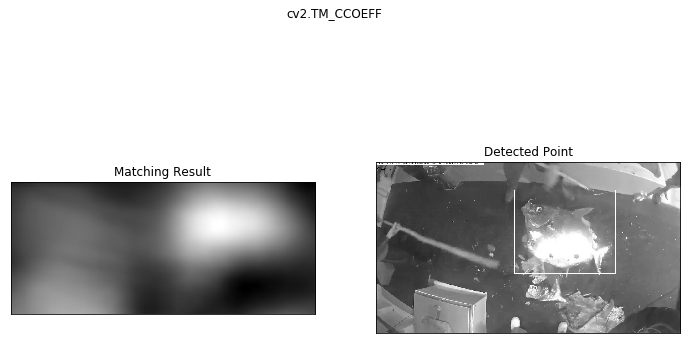

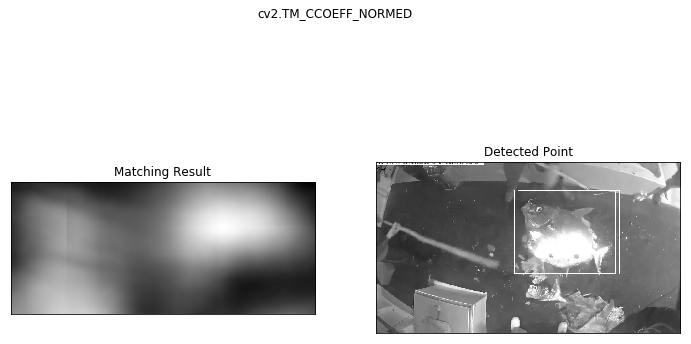

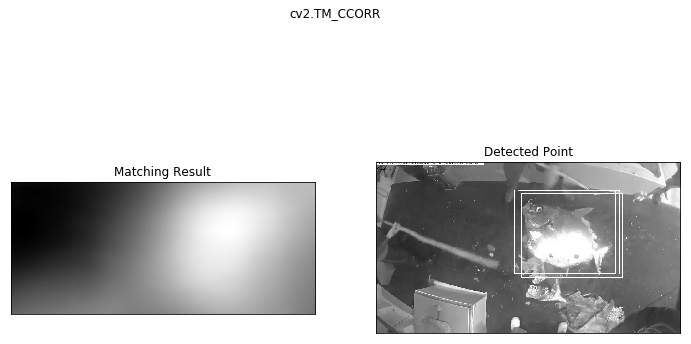

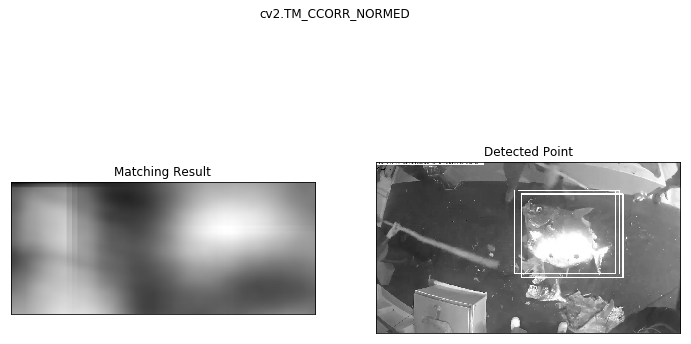

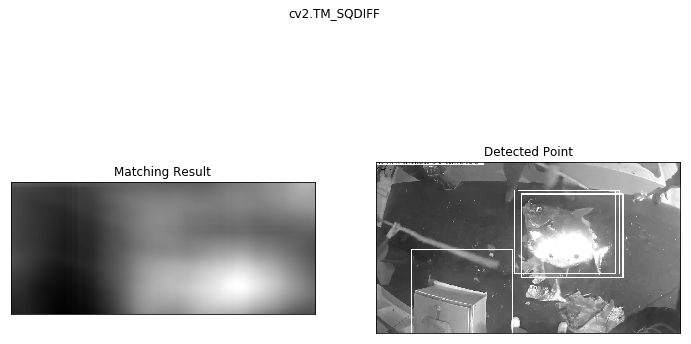

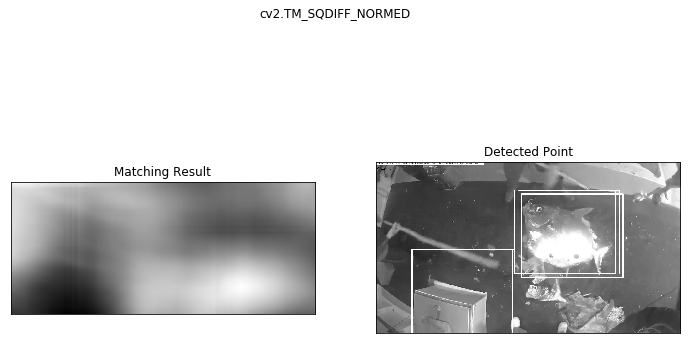

In [3]:

file_name = '../input/train/LAG/img_01512.jpg' # img_00176,img_02758, img_01512
img = cv2.imread(file_name,0) 
img2 = img
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
     img = img2
     method = eval(meth)
 
     # Apply template Matching
     res = cv2.matchTemplate(img,template,method)
     min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
 
     # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
     if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
         top_left = min_loc
     else:
         top_left = max_loc
     bottom_right = (top_left[0] + w, top_left[1] + h)
 
     cv2.rectangle(img,top_left, bottom_right, 255, 2)
     fig, ax = plt.subplots(figsize=(12, 7))
     plt.subplot(121),plt.imshow(res,cmap = 'gray')
     plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
     plt.subplot(122),plt.imshow(img,cmap = 'gray') #,aspect='auto'
     plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
     plt.suptitle(meth)
 
     plt.show()

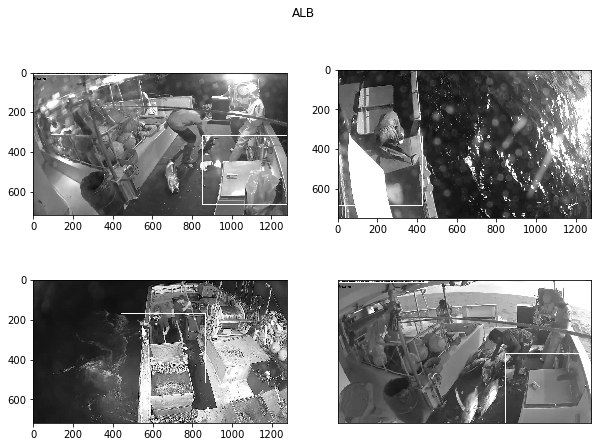

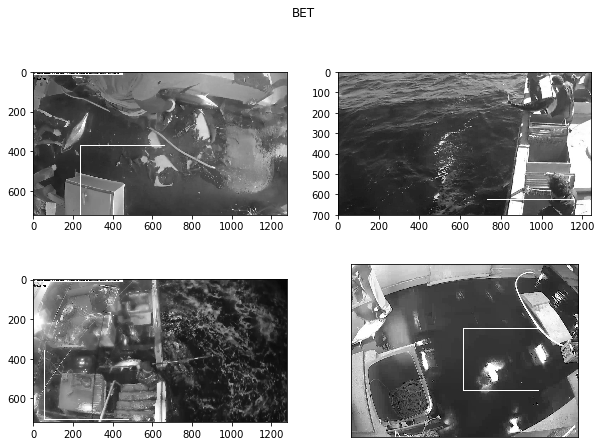

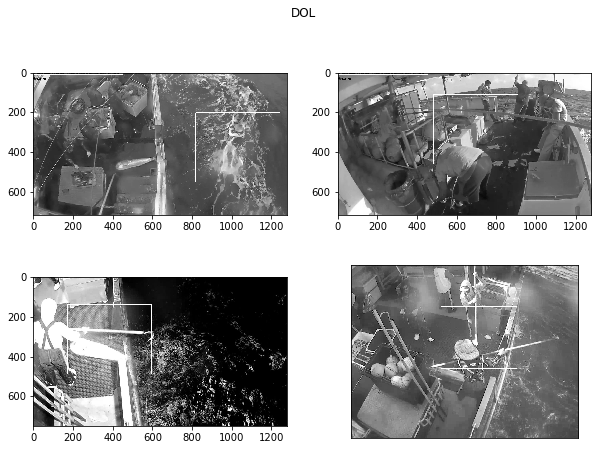

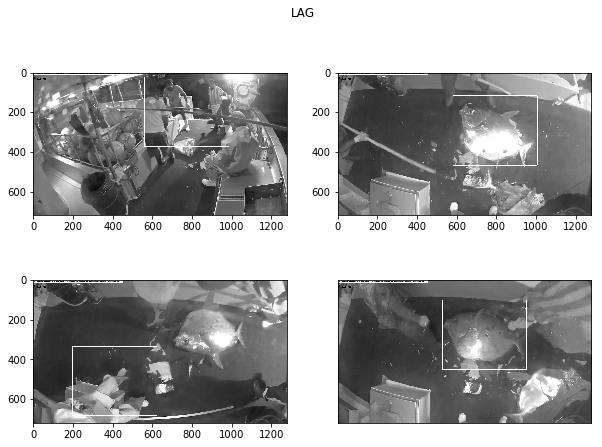

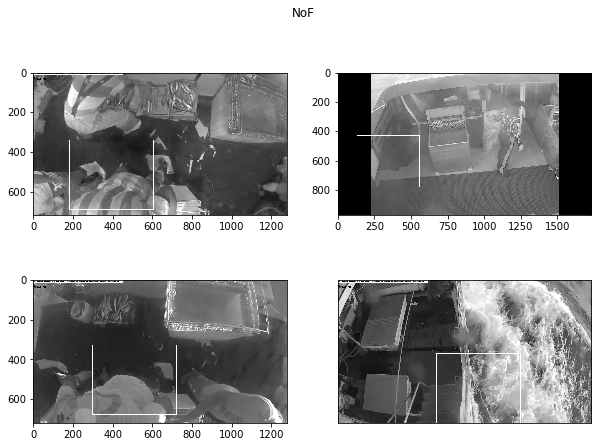

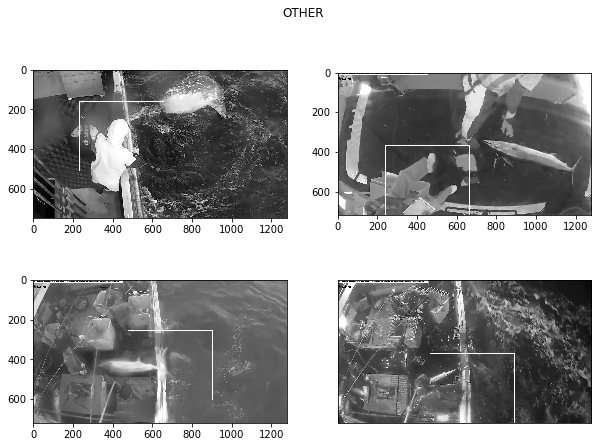

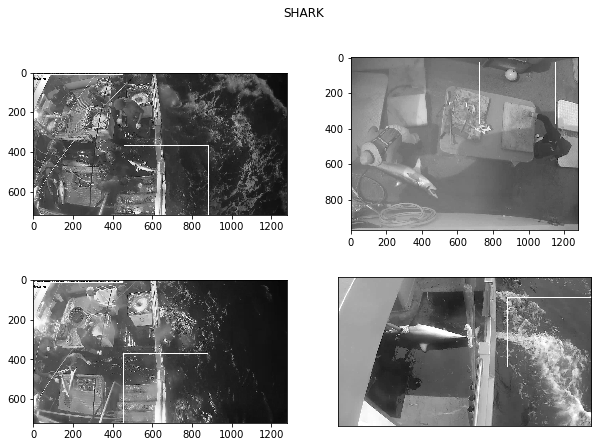

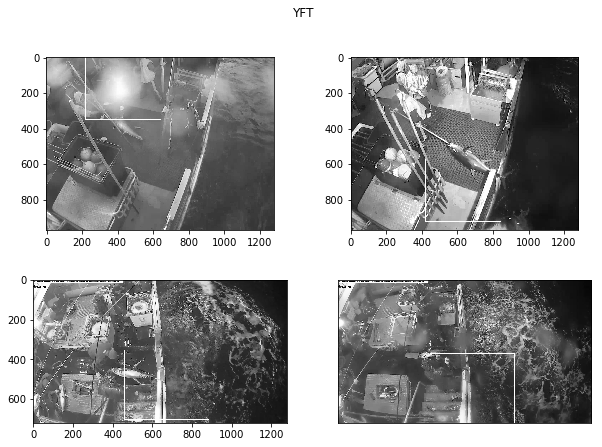

In [4]:

method = eval('cv2.TM_CCOEFF')
indexes=[1,30,40,5]

train_path = "../input/train/"
sub_folders = check_output(["ls", train_path]).decode("utf8").strip().split('\n')
for sub_folder in sub_folders:
    file_names = check_output(["ls", train_path+sub_folder]).decode("utf8").strip().split('\n')
    k=0
    _, ax = plt.subplots(2,2,figsize=(10, 7))
    for file_name in [file_names[x] for x in indexes]: # I take only 4 images of each group. 
        img = cv2.imread(train_path+sub_folder+"/"+file_name,0)
        img2 = img
        w, h = template.shape[::-1]
        # Apply template Matching
        res = cv2.matchTemplate(img,template,method)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)
 
        cv2.rectangle(img,top_left, bottom_right, 255, 2)
        if k==0 : 
            ax[0,0].imshow(img,cmap = 'gray')
            plt.xticks([]), plt.yticks([])
        if k==1 : 
            ax[0,1].imshow(img,cmap = 'gray')
            plt.xticks([]), plt.yticks([])
        if k==2 : 
            ax[1,0].imshow(img,cmap = 'gray')
            plt.xticks([]), plt.yticks([])
        if k==3 : 
            ax[1,1].imshow(img,cmap = 'gray')
            plt.xticks([]), plt.yticks([])
        k=k+1
    plt.suptitle(sub_folder)
    plt.show()

### Remark :
As we can see, with a LAG template, we almost find all the LAG fish. This is good point. 
The other good point is that we don't find in our rectangle the other fish. Now the idea is to create the other template and do it for all the images. 


# Part 2

### Soon.... 


On the same way, the goal is to detect the fish in an image. 

There exist a method to find Shapes in an image. ([*tutorial*](http://www.pyimagesearch.com/2014/10/20/finding-shapes-images-using-python-opencv/))